<a href="https://colab.research.google.com/github/pranav4kt/SIDDHA-/blob/main/SIDDHA_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
dataset_path = "/content/drive/MyDrive/SIDDHA_DATASET"


In [8]:
train_path = os.path.join(dataset_path, "train")
val_path = os.path.join(dataset_path, "val")
test_path = os.path.join(dataset_path, "test")

In [3]:
import os

# Define class paths
good_path = os.path.join(dataset_path, "GOOD PROGNOSIS")
bad_path = os.path.join(dataset_path, "BAD PROGNOSIS")

# Count images
num_good = len(os.listdir(good_path))
num_bad = len(os.listdir(bad_path))

print(f"Good Prognosis Images: {num_good}")
print(f"Bad Prognosis Images: {num_bad}")
print(f"Total Images: {num_good + num_bad}")


Good Prognosis Images: 86
Bad Prognosis Images: 46
Total Images: 132


In [7]:
import os
import shutil
import random


dataset_path = "/content/drive/MyDrive/SIDDHA_DATASET"
train_path = os.path.join(dataset_path, "train")
val_path = os.path.join(dataset_path, "val")
test_path = os.path.join(dataset_path, "test")


for path in [train_path, val_path, test_path]:
    os.makedirs(os.path.join(path, "GOOD PROGNOSIS"), exist_ok=True)
    os.makedirs(os.path.join(path, "BAD PROGNOSIS"), exist_ok=True)


def split_data(source_dir, train_dir, val_dir, test_dir, train_ratio=0.7, val_ratio=0.2):
    images = os.listdir(source_dir)
    random.shuffle(images)

    train_count = int(len(images) * train_ratio)
    val_count = int(len(images) * val_ratio)

    for i, img in enumerate(images):
        src_path = os.path.join(source_dir, img)

        if i < train_count:
            dst_path = os.path.join(train_dir, img)
        elif i < train_count + val_count:
            dst_path = os.path.join(val_dir, img)
        else:
            dst_path = os.path.join(test_dir, img)

        shutil.move(src_path, dst_path)


split_data(os.path.join(dataset_path, "GOOD PROGNOSIS"),
           os.path.join(train_path, "GOOD PROGNOSIS"),
           os.path.join(val_path, "GOOD PROGNOSIS"),
           os.path.join(test_path, "GOOD PROGNOSIS"))

split_data(os.path.join(dataset_path, "BAD PROGNOSIS"),
           os.path.join(train_path, "BAD PROGNOSIS"),
           os.path.join(val_path, "BAD PROGNOSIS"),
           os.path.join(test_path, "BAD PROGNOSIS"))

print("Dataset successfully split into Train, Validation, and Test!")


Dataset successfully split into Train, Validation, and Test!


In [9]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)


val_generator = train_datagen.flow_from_directory(
    val_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)


test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)


print(f"Training Samples: {train_generator.samples}")
print(f"Validation Samples: {val_generator.samples}")
print(f"Test Samples: {test_generator.samples}")


Found 92 images belonging to 4 classes.
Found 26 images belonging to 4 classes.
Found 14 images belonging to 4 classes.
Training Samples: 92
Validation Samples: 26
Test Samples: 14


In [10]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.models import Model
import numpy as np
import os


IMG_SIZE = (224, 224)
BATCH_SIZE = 16


base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


feature_extractor = Model(inputs=base_model.input, outputs=base_model.output)
feature_extractor.trainable = False  # Freeze model (no training)


def extract_features(directory):
    features = []
    labels = []
    class_names = sorted(os.listdir(directory))  # Ensure correct class ordering

    for class_idx, class_name in enumerate(class_names):
        class_dir = os.path.join(directory, class_name)
        if not os.path.isdir(class_dir):  # Skip non-directory files
            continue

        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            try:
                img = load_img(img_path, target_size=IMG_SIZE)
                img_array = img_to_array(img) / 255.0  # Normalize
                img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

                feature = feature_extractor.predict(img_array)
                features.append(feature.flatten())  # Flatten feature map
                labels.append(class_idx)  # Assign class label
            except:
                print(f"Skipping {img_name} due to error.")

    return np.array(features), np.array(labels)


X_train, y_train = extract_features(train_path)
X_val, y_val = extract_features(val_path)
X_test, y_test = extract_features(test_path)

print(f"Feature Shape: {X_train.shape}, Labels: {y_train.shape}")


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1

In [30]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


svm = SVC(kernel='linear', C=1.0)  # Adjust C for regularization if needed
svm.fit(X_train_scaled, y_train)

y_pred = svm.predict(X_test_scaled)


print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Test Accuracy: 0.9285714285714286
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.90      1.00      0.95         9

    accuracy                           0.93        14
   macro avg       0.95      0.90      0.92        14
weighted avg       0.94      0.93      0.93        14



Accuracy: 0.9286
Precision: 0.9000
Recall: 1.0000
F1 Score: 0.9474

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.90      1.00      0.95         9

    accuracy                           0.93        14
   macro avg       0.95      0.90      0.92        14
weighted avg       0.94      0.93      0.93        14



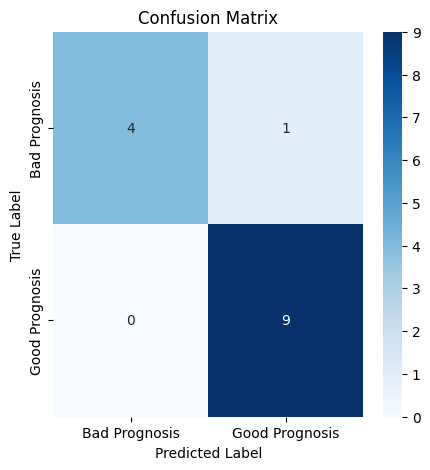

In [12]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions on test set
y_pred = svm.predict(X_test_scaled)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Precision, Recall, F1-score
precision = precision_score(y_test, y_pred, average='binary')  # Use 'macro' for multi-class
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

# Classification Report
report = classification_report(y_test, y_pred)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# 📊 Display Metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nClassification Report:\n", report)

# 📉 Confusion Matrix Visualization
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Bad Prognosis', 'Good Prognosis'], yticklabels=['Bad Prognosis', 'Good Prognosis'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [13]:
pip install joblib

In [15]:
import joblib
joblib.dump(svm, "mobilenetv2_svm.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [17]:
import joblib
import numpy as np
import cv2
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

svm_model = joblib.load("/content/mobilenetv2_svm.pkl")
scaler = joblib.load("/content/scaler.pkl")

base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(224, 224, 3))


In [25]:
def preprocess_image(image_path):
    # Load and resize the image
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224, 224))

    # Convert image to array and preprocess for MobileNetV2
    img_array = np.expand_dims(img, axis=0)
    img_array = preprocess_input(img_array)  # Normalize as per MobileNetV2

    return img_array

image_path = "/content/B2.png"  # Change this to your image path
image_array = preprocess_image(image_path)


In [26]:
# Extract features
features = base_model.predict(image_array)
features = features.flatten().reshape(1, -1)  # Flatten and reshape for SVM

# Standardize using the same scaler used during training
features_scaled = scaler.transform(features)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


In [29]:
# Get prediction from SVM
prediction = svm_model.predict(features_scaled)

# Output result
if prediction[0] == 0:
    print("Prediction: Bad Prognosis")
else:
    print("Prediction: Good Prognosis")


Prediction: Bad Prognosis
